# Apple Quality - Data Analysis and Machine Learning Tutorial
This Jupyter notebook provides an overview from start to finish of exploring and cleaning a dataset in order to apply classic machine learning methods to it. We explore an apple quality dataset sourced from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality). We analyze the dataset and clean it in order to prepare it for machine learning. Then we use scikit-learn implementations of six different classifiers to predict an apple's quality from its features.

## Exploratory Data Analysis
First, we import necessary Python libraries for data analysis. Note that you must install these libraries first using conda or pip in order to use them.

In [37]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

Next, we load the CSV file into a DataFrame and begin analyzing the data. Specifically, we check the shape of the DataFrame to see how many rows and columns it contains, and we use .info() to examine the number of non-null entries in each column.

In [38]:
apples = pd.read_csv("../data/apples.csv")
apples.shape
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


We convert the Acidity column to a numeric data type using pd.to_numeric(). For the Quality column, we map the values 'good' and 'bad' to 1 and 0, respectively. This allows us to change the column to a numeric data type, which is necessary for creating visualizations like heatmaps that require numerical input

In [39]:
apples['Acidity'] = pd.to_numeric(apples['Acidity'])
apples['Quality'] = apples['Quality'].map({'good':1, 'bad':0})
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


We check for any missing values in the dataset using isnull().sum(). This returns the number of null entries in each column, helping us identify if any data cleaning is needed before analysis. If there are any missing values, we remove those rows and verify that there are no longer null entries.

In [40]:
apples.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [41]:
apples.dropna(inplace=True)
apples.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

We use describe() to generate summary statistics for the numerical columns in the dataset. Then, we use head() to preview the first few rows of the dataset, giving us a look at the structure and values of the data after cleaning.

In [42]:
apples.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [43]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In the following cells we provide examples of different types of data visualizations. We plot histograms with kernel density estimate (KDE) curves for features like Size, Weight, Sweetness, Crunchiness, Juiciness, and Ripeness to examine their distributions. A strip plot for Acidity highlights its distinct distribution. Lastly, we use a correlation heatmap to visualize relationships between numerical features, helping identify correlations for further analysis.

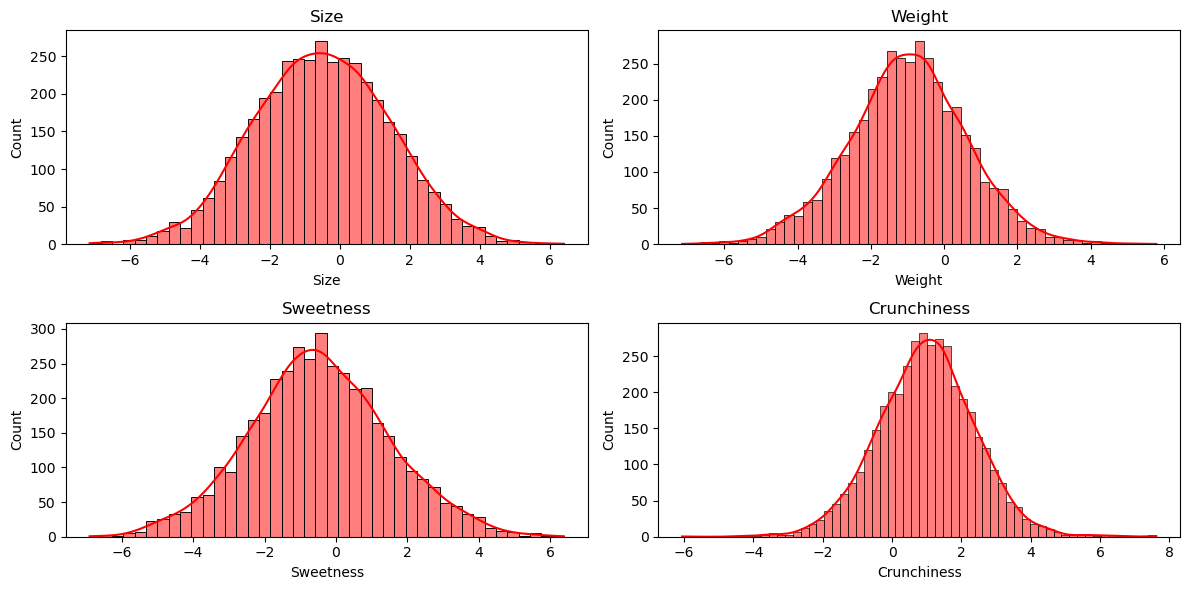

In [44]:
plt.figure(figsize=(12, 6))
#kernel density estimate curve added 
# Size
plt.subplot(2, 2, 1)
sns.histplot(x=apples['Size'], kde=True, color='red')
plt.title('Size')

# Weight
plt.subplot(2, 2, 2)
sns.histplot(x=apples['Weight'], kde=True,color='red')
plt.title('Weight')

# Sweetness
plt.subplot(2, 2, 3)
sns.histplot(x=apples['Sweetness'], kde=True, color='red')
plt.title('Sweetness')

# Crunchiness
plt.subplot(2, 2, 4)
sns.histplot(x=apples['Crunchiness'], kde=True,color='red')
plt.title('Crunchiness')

plt.tight_layout() 
plt.show()

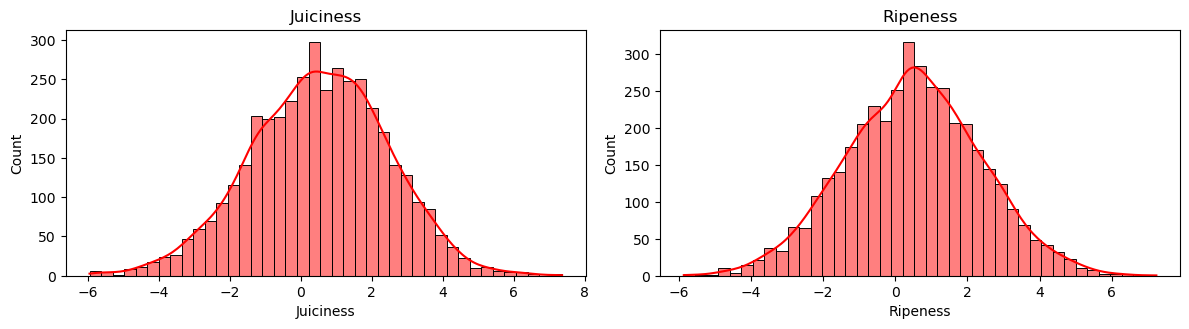

In [45]:
plt.figure(figsize=(12, 6))

# Juiciness
plt.subplot(2, 2, 1)
sns.histplot(x=apples['Juiciness'], kde=True,color='red')
plt.title('Juiciness')

# Ripeness
plt.subplot(2, 2, 2)
sns.histplot(x=apples['Ripeness'], kde=True,color='red')
plt.title('Ripeness')

plt.tight_layout()
plt.show()

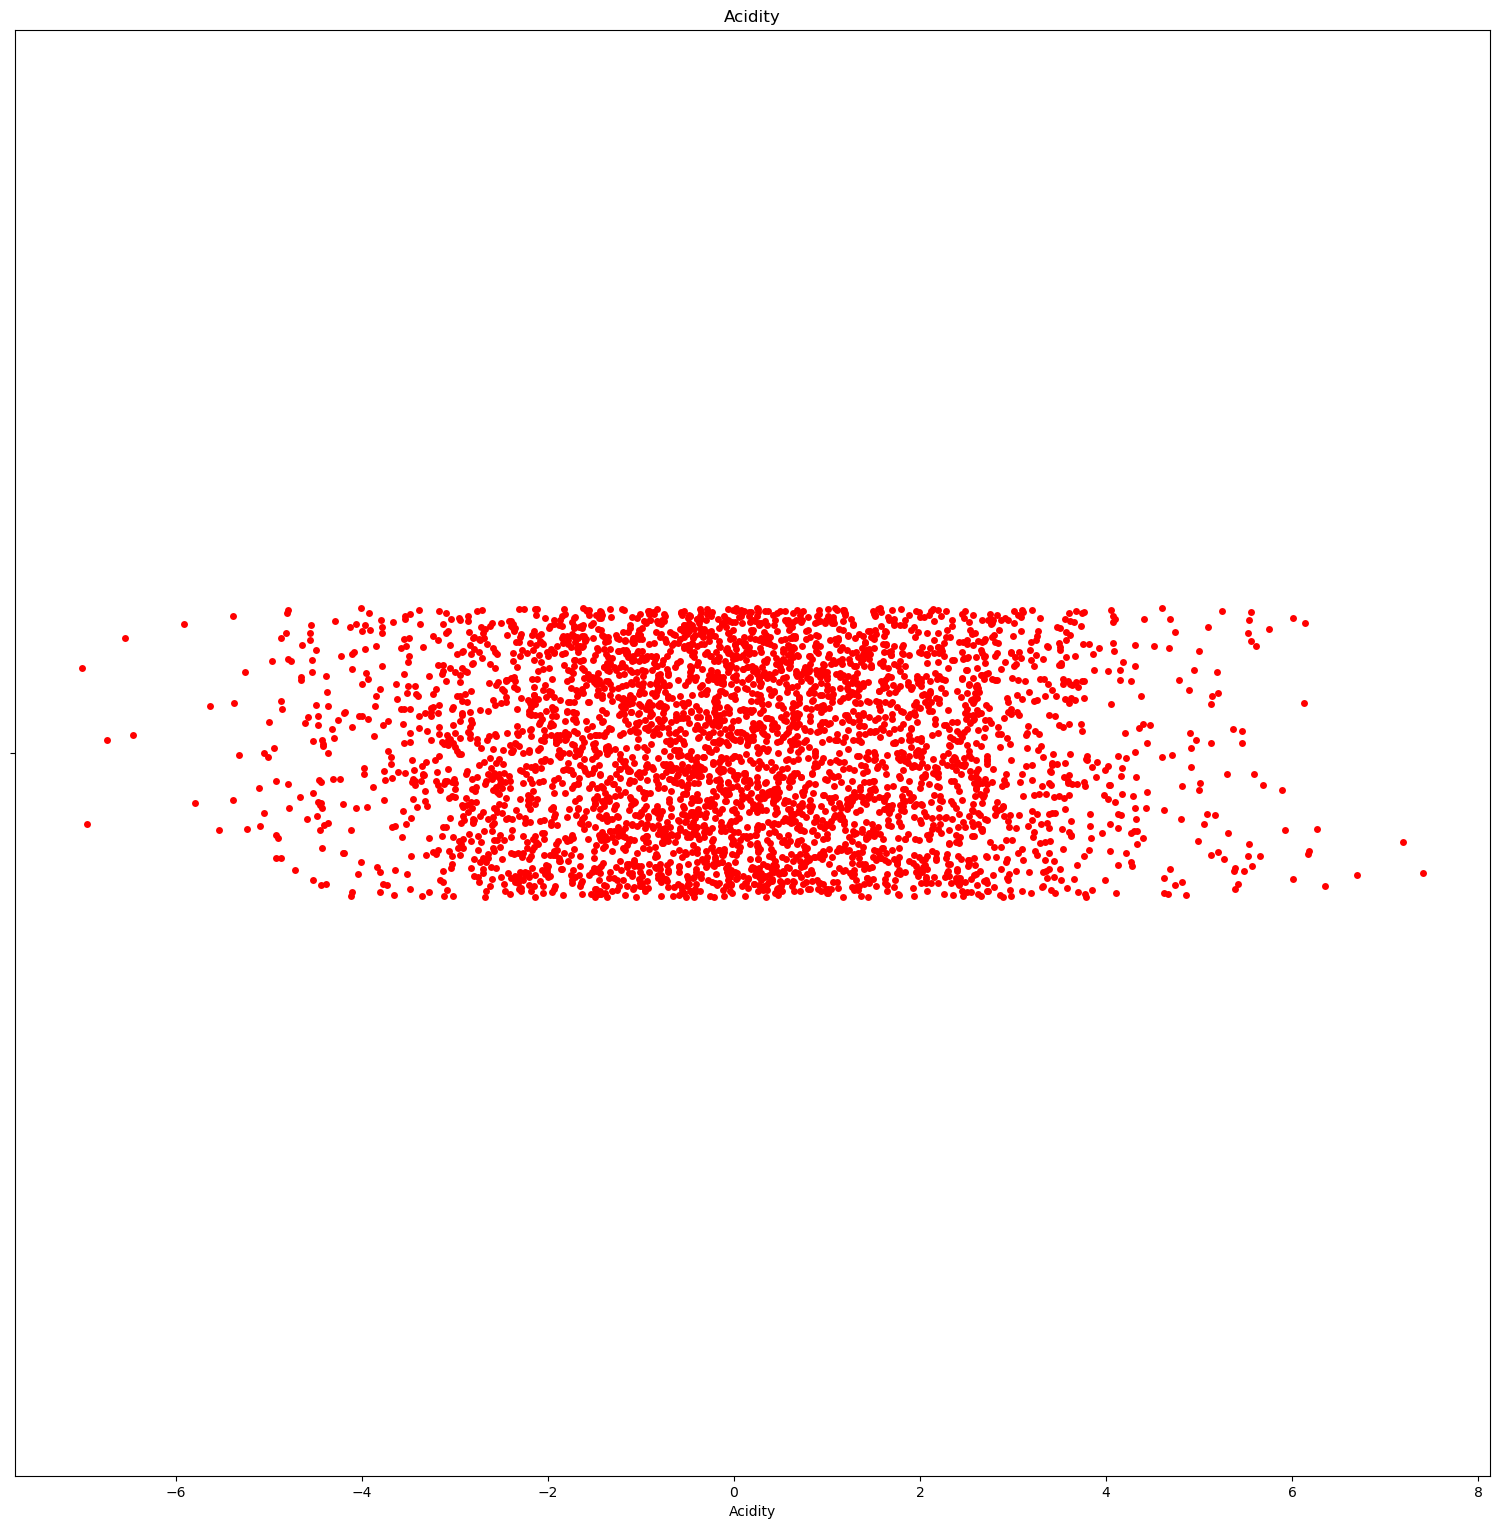

In [46]:
plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 3)
sns.stripplot(x=apples['Acidity'], color='red') 
plt.title('Acidity')
plt.tight_layout()
plt.show()

<Axes: >

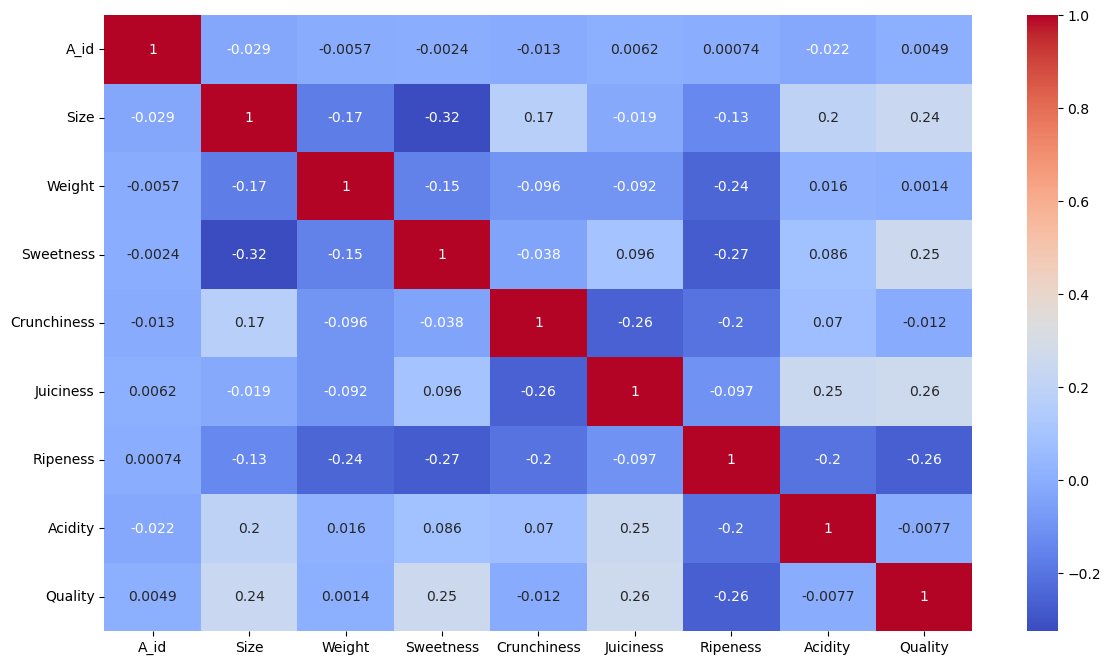

In [47]:
plt.figure(figsize=(14, 8))
sns.heatmap(apples.corr(),annot=True,cmap='coolwarm')

To handle outliers, we calculate the Interquartile Range by subtracting the 25th percentile from the 75th percentile. We then filter out any rows where values fall outside the range defined by the lower bound and the upperbound. This is applied to each column to ensure the data stays within reasonable bounds, effectively removing extreme outliers. We then visualize the cleaned dataset to showcase the difference before and after we handled the outliers. 

In [48]:
Q1 = apples.quantile(0.25)
Q3 = apples.quantile(0.75)
IQR = Q3 - Q1 #interquartile range 

apples_cleaned = apples[
    ((apples >= (Q1 - 1.5 * IQR)) #lowerbound 
      & (apples <= (Q3 + 1.5 * IQR)) #upperbound
      ).all(axis=1)
]
#^ applied to each column 
print(apples_cleaned.shape) 

(3790, 9)


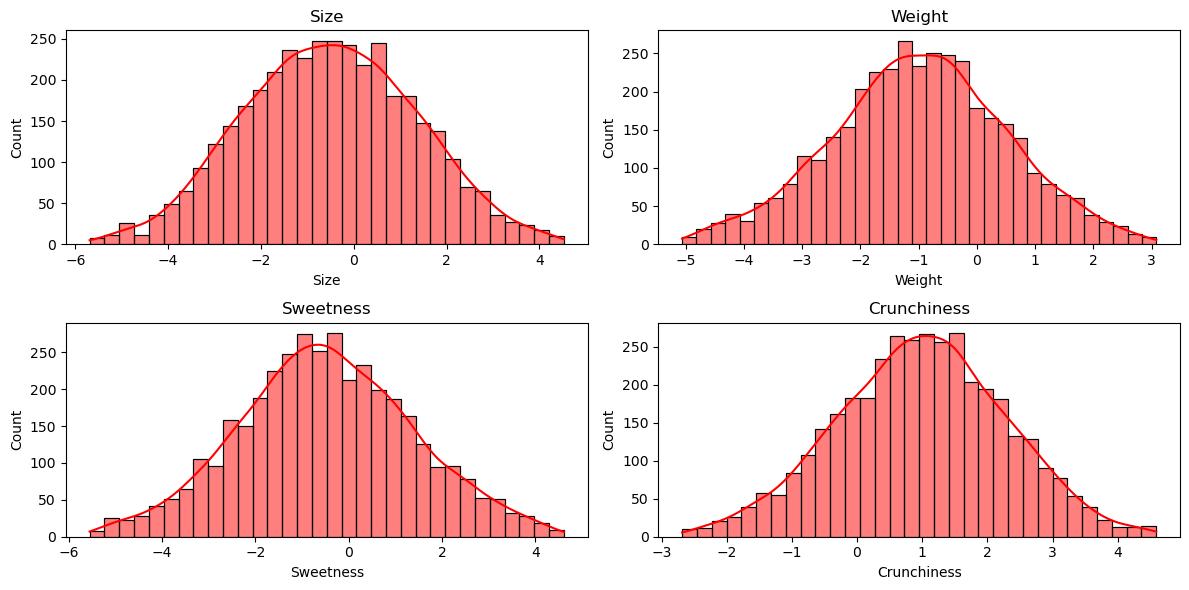

In [49]:
plt.figure(figsize=(12, 6))

# Size
plt.subplot(2, 2, 1)
sns.histplot(x=apples_cleaned['Size'],kde=True,color='red')
plt.title('Size')

# Weight
plt.subplot(2, 2, 2)
sns.histplot(x=apples_cleaned['Weight'],kde=True,color='red')
plt.title('Weight')

# Sweetness
plt.subplot(2, 2, 3)
sns.histplot(x=apples_cleaned['Sweetness'],kde=True,color='red')
plt.title('Sweetness')

# Crunchiness
plt.subplot(2, 2, 4)
sns.histplot(x=apples_cleaned['Crunchiness'], kde=True,color='red')
plt.title('Crunchiness')

plt.tight_layout() 
plt.show()

<Axes: >

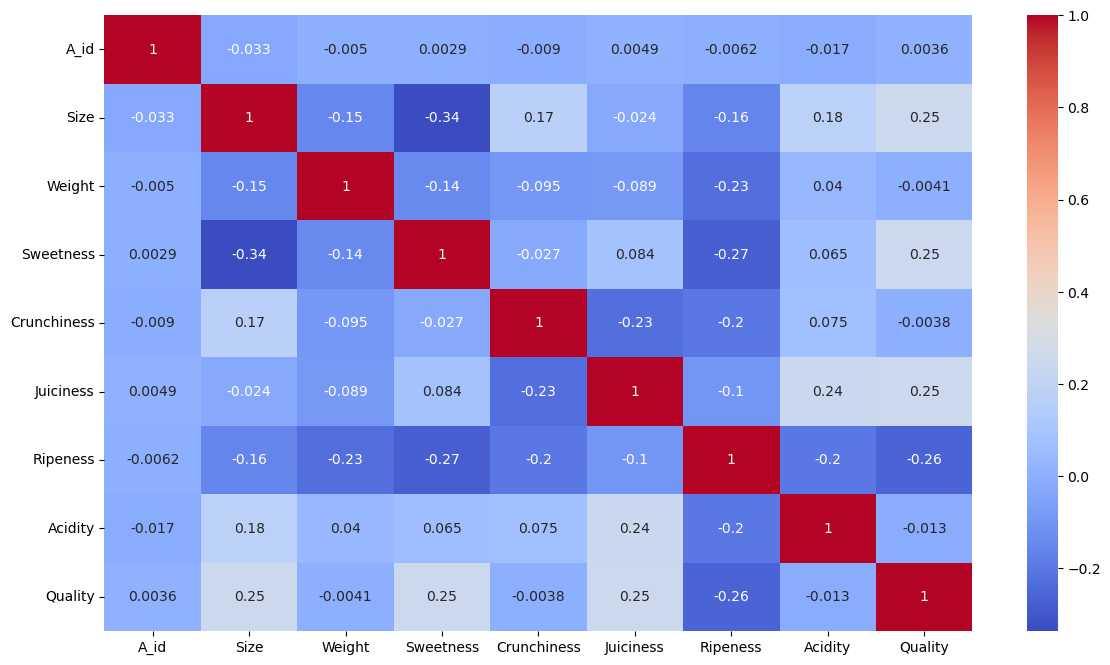

In [50]:
plt.figure(figsize=(14, 8))
sns.heatmap(apples_cleaned.corr(),annot=True,cmap='coolwarm')

## Machine Learning
First, we import necessary scikit-learn methods for machine learning. Note that you must install the scikit-learn library first using conda or pip in order to use the methods.

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Next, we create a dataframe to store the results of our six classifiers in terms of accuracy, precision, recall, and f1 score.

In [52]:
apples_columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1']
apples_results = pd.DataFrame(columns=apples_columns)
apples_rows = []

We will predict apple quality from its size, weight, sweetness, crunchiness, juiciness, ripeness, and acidity. The classifier will output the apple's quality, which we store in the y variable. We store the features we will use to predict the quality in the x variable. We create X and y as numpy arrays and use the scikit-learn ```train_test_spit``` method to split the data into 33/67 test/train split. We then normalize the data to ensure the best classifier performance using scikit-learn's ```StandardScaler```.

In [53]:
y = apples['Quality'].to_numpy()
apples_x = apples[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
X = apples_x.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### K-Nearest Neighbors (KNN)
First, we use KNN to classify the data. We create the model, fit the training data to it, and make predictions.

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

We store the accuracy, precision, recall, and f1 score in our dataframe from before.

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'KNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

We generate a confusion matrix to view the true and false positive and negative instances of classification.

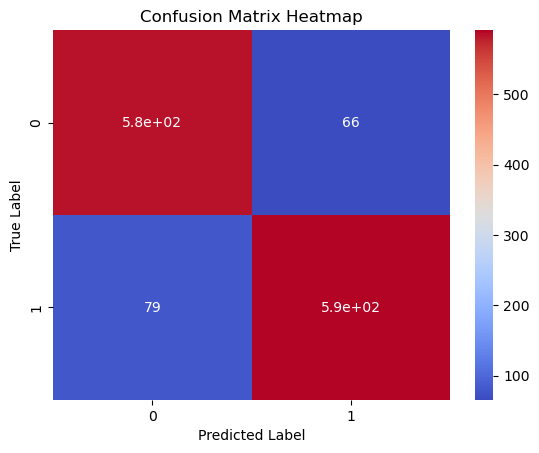

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

We repeat these steps with 5 other classifiers:
- Support Vector Machine (SVM)
- Naive-Bayes (NB)
- Random Forest (RF)
- Logistic Regression (LR)
- Decision Tree (DT)

### Support Vector Machine

In [57]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'SVM',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

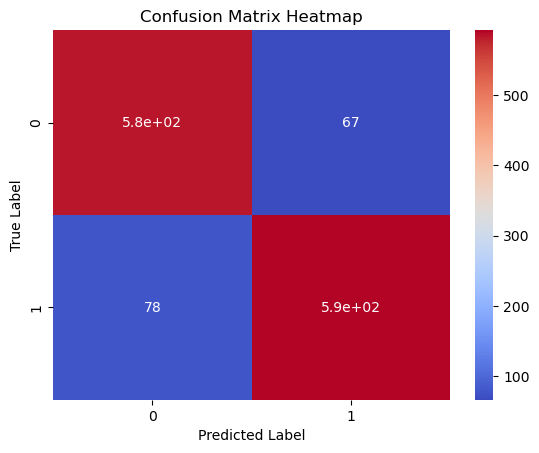

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Naive-Bayes

In [60]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'NB',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

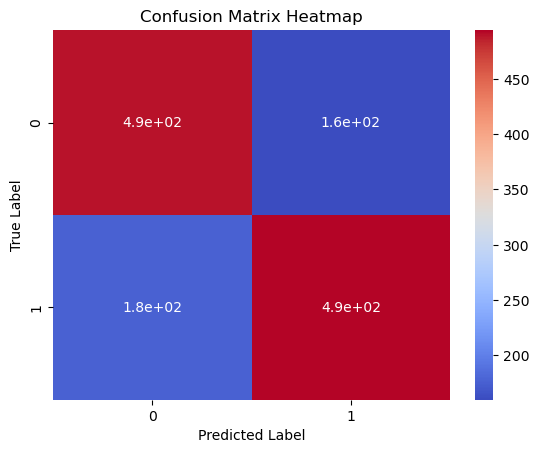

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Random Forest

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'RF',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

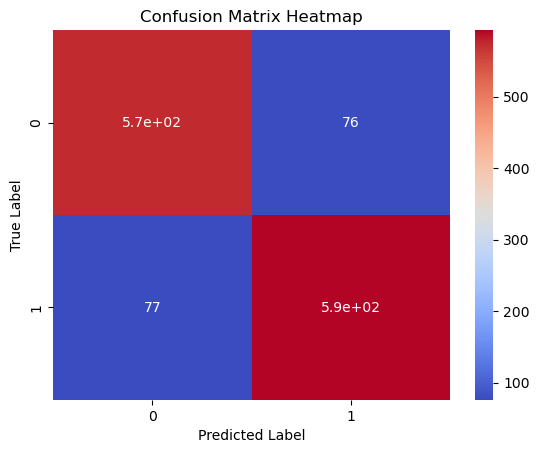

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Logistic Regression

In [66]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'LR',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

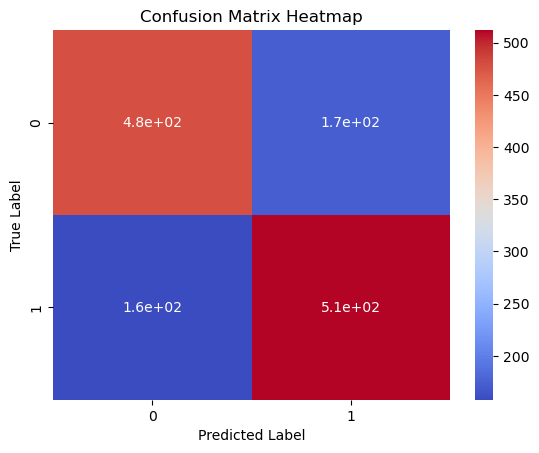

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Decision Tree

In [69]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'Classifier': 'DT',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}

apples_rows.append(metrics)

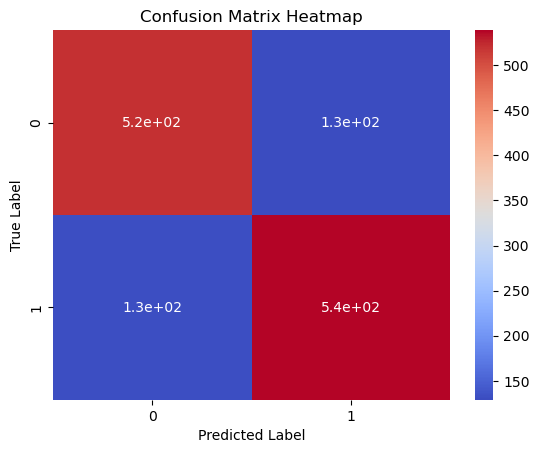

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

After training and testing all classifiers, we concatenate their results into a shared dataframe.

In [72]:
apples_results = pd.concat([apples_results, pd.DataFrame(apples_rows)], ignore_index=True)
print(apples_results)

  Classifier  Accuracy  Precision    Recall        F1
0        KNN  0.890152   0.899543  0.882090  0.890731
1        SVM  0.890152   0.898331  0.883582  0.890895
2         NB  0.745455   0.755352  0.737313  0.746224
3         RF  0.884091   0.886398  0.885075  0.885736
4         LR  0.750000   0.748538  0.764179  0.756278
5         DT  0.803030   0.806886  0.804478  0.805680


/var/folders/k6/sf8fkfl90gjc74kqjcpgm1jh0000gn/T/ipykernel_71928/2912211423.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  apples_results = pd.concat([apples_results, pd.DataFrame(apples_rows)], ignore_index=True)


We create a plot for each of the four metrics and display the results for all 6 classifiers.

/var/folders/k6/sf8fkfl90gjc74kqjcpgm1jh0000gn/T/ipykernel_71928/324335966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y=metric, data=apples_results, palette='Blues_d')
/var/folders/k6/sf8fkfl90gjc74kqjcpgm1jh0000gn/T/ipykernel_71928/324335966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y=metric, data=apples_results, palette='Blues_d')
/var/folders/k6/sf8fkfl90gjc74kqjcpgm1jh0000gn/T/ipykernel_71928/324335966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y=metric, data=app

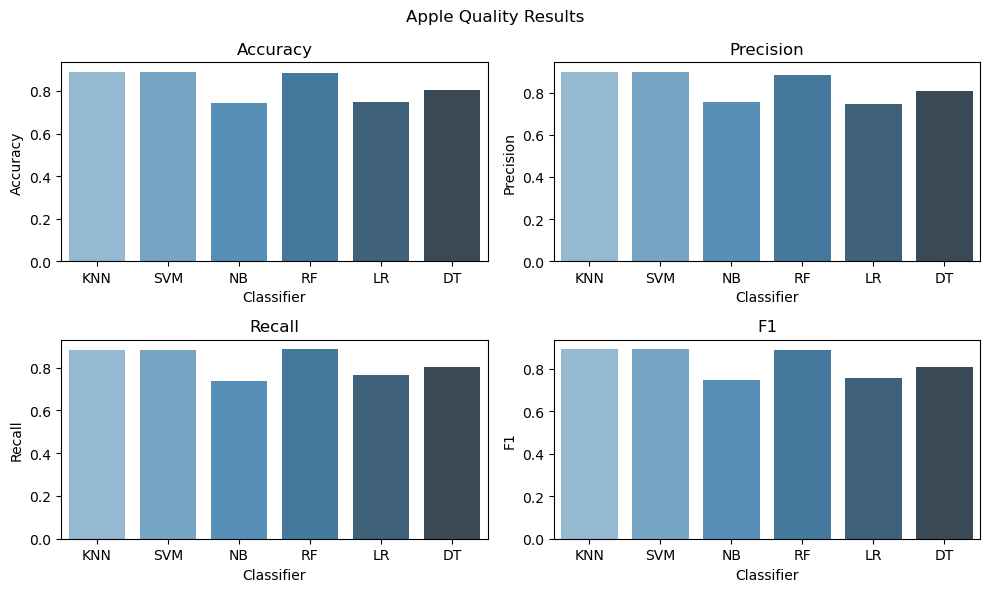

In [73]:
plt.figure(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Classifier', y=metric, data=apples_results, palette='Blues_d')
    plt.title(metric)
    plt.xlabel('Classifier')
    plt.ylabel(metric)

plt.suptitle('Apple Quality Results')
plt.tight_layout()
plt.show()